# [Bài tập] Xây dựng mô hình hồi quy tuyến tính dự đoán chi phí y tế cá nhân


### Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Vẽ biểu đồ để trực quan hóa mối quan hệ giữa tuổi của người được bảo hiểm (age) với chi phí y tế (charges); 

## và mối quan hệ giữa chỉ số trọng lượng cơ thể (bmi) với chi phí y tế (charges).

##### Vẽ biểu đồ để trực quan hóa mối quan hệ giữa tuổi của người được bảo hiểm (age) với chi phí y tế (charges)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

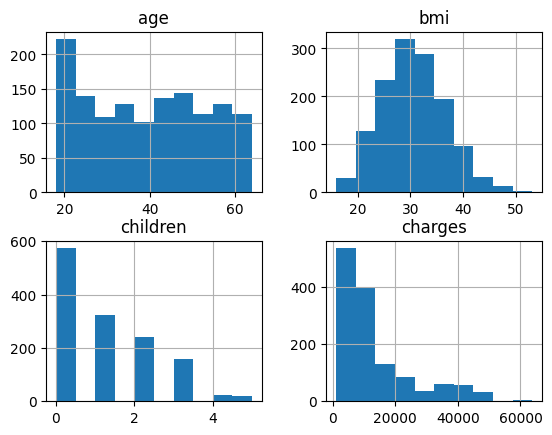

In [6]:
df.hist()

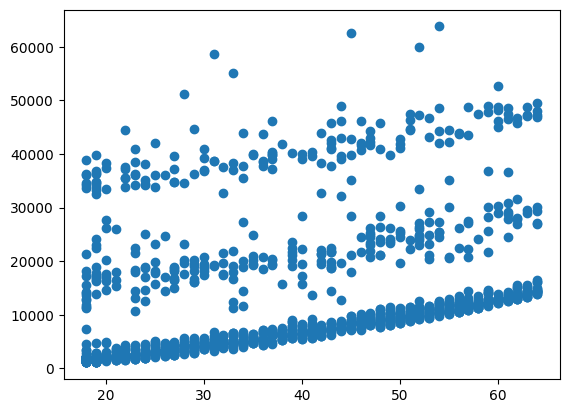

In [34]:
plt.scatter(df['age'], df['charges'])
plt.show()

In [ ]:
# Nhận xét: tuổi càng cao thì chi phí y tế càng cao


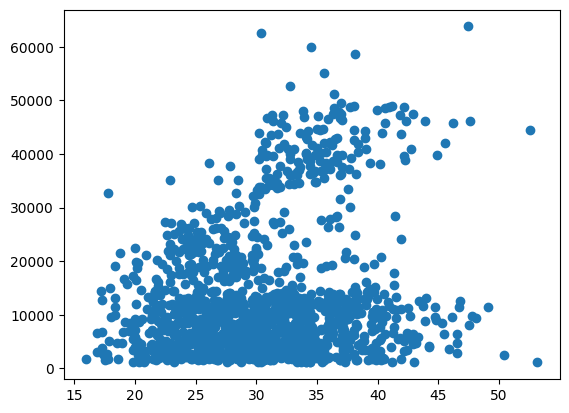

In [35]:
plt.scatter(df['bmi'], df['charges'])
plt.show()

#### Nhận xét: 

Chi phí dưới 12000 thì không nhận thấy mối liên quan với bmi

bắt đầu chi phí từ 12000 trở lên thì chỉ số bmi càng cao thì chi phí càng cao

## Chuyển các biến có kiểu categorical: sex, smoker, region thành các biến “Dummy”: 

sex_female , sex_male, smoker_no, smoker_yes, region_northeast  region_northwest region_southeast, region_southwest. 

Sau đó loại bớt 2 trường không cần thiết:  sex_male, smoker_no.

##### Mã hoá One hot encoding

In [7]:

dummy = pd.get_dummies(df[['sex', 'smoker', 'region']])
dummy

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,True,False,False,True,False,False,False,True
1,False,True,True,False,False,False,True,False
2,False,True,True,False,False,False,True,False
3,False,True,True,False,False,True,False,False
4,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,False,True,True,False,False,True,False,False
1334,True,False,True,False,True,False,False,False
1335,True,False,True,False,False,False,True,False
1336,True,False,True,False,False,False,False,True


In [8]:
dummy = pd.get_dummies(df[['sex', 'smoker', 'region']]).astype(int)
dummy

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


##### Sau đó loại bớt 2 trường không cần thiết:  sex_male, smoker_no.

In [9]:
df = pd.concat([df, dummy], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [10]:
df = df.drop(['sex_male', 'smoker_no', 'sex', 'smoker', 'region'], axis=1)
df.head()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


In [11]:
df.describe()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.

## Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là chi phí y tế, các biến đầu vào là các trường còn lại. Đánh giá mô hình.

In [12]:
# Mối quan hệ giữa các biến
# age và charges
#charges = age*a + b
# Chỉ định biến
X = df[['age']]
y = df['charges']


In [13]:
# Tách dữ liệu
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 102)

In [15]:
len(X_train)

1070

In [16]:
len(X_test)

268

In [17]:
# Xây mô hình

In [18]:
# Gọi hàm Linear Regression
lr = LinearRegression()

In [19]:
# Áp hàm này lên tập train
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
coefficient = lr.coef_

In [21]:
intercept = lr.intercept_

In [22]:
coefficient

array([237.08123775])

In [23]:
intercept

4088.1038042509626

In [24]:
# đọc mô hình
# charges = age*coefficient + intercept
# Giả sử 18 tuổi, thì chi phí y tế dự đoán của công ty sẽ bằng bao nhiêu?
charges_1 = 18*coefficient + intercept
charges_1 

array([8355.56608376])

In [25]:
# đánh giá kết quả mô hình
y_pred = lr.predict(X_test)
y_pred

array([18787.14054477, 13571.35331427,  8592.64732151, 13571.35331427,
       12860.10960101, 18075.89683152, 10489.29722351, 10963.45969901,
       12148.86588776, 14282.59702752,  8355.56608376, 15230.92197852,
       10489.29722351, 19024.22178252, 17601.73435602,  9778.05351026,
       18787.14054477,  8355.56608376, 18550.05930702, 12623.02836326,
       16653.40940502, 15468.00321627, 15942.16569177, 10015.13474801,
        8829.72855926, 18312.97806927, 17364.65311827, 19024.22178252,
        9540.97227251, 17364.65311827, 14756.75950302, 11674.70341226,
       10963.45969901, 14282.59702752, 13334.27207652, 14519.67826527,
        9066.80979701, 10489.29722351,  8592.64732151,  9303.89103476,
        9303.89103476, 10015.13474801,  9303.89103476, 11437.62217451,
       17127.57188052, 10015.13474801, 10252.21598576, 11200.54093676,
        8592.64732151, 17364.65311827,  9540.97227251, 13097.19083877,
       14756.75950302, 14045.51578977, 18312.97806927,  8592.64732151,
      

In [26]:
# Chỉ số: Mean Absolute Error, Mean Square Error, Root Mean Square Error
from sklearn import metrics

In [36]:
# Đánh giá mô hình

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8739.785066642295
Mean Squared Error: 119158807.61908421
Root Mean Squared Error: 10915.988623074147


### Mô hình hồi quy tuyến tính giữa các biến age, bmi, children	và charges	

In [28]:
X = df[['age', 'bmi', 'children']]
y = df['charges']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [30]:
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8818.227213860555
Mean Squared Error: 117023126.36982849
Root Mean Squared Error: 10817.722790394866


### Mô hình hồi quy tuyến tính của tất các biến của bảng df với charges

In [38]:
# Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.
from sklearn.model_selection import train_test_split
X = df.drop(['charges'], axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 102)

In [39]:
# Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là chi phí y tế, các biến đầu vào là các trường còn lại.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
# Đánh giá mô hình.
from sklearn import metrics
y_pred = lr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4312.282062658764
Mean Squared Error: 38400295.99916713
Root Mean Squared Error: 6196.797237215942


In [41]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

#### Giải thích các chỉ số trên:

##### Mean Absolute Error: trung bình chi phí y tế dự đoán đang lệch khỏi chi phí y tế trung bình thật 4312 USD
##### Root Mean Squared Error: nếu đánh giá kết quả chặt chẽ hơn, thì trung bình chi phí y tế dự đoán đang lệch khỏi chi phí y tế thật 6196 USD 

Chi phí y tế trung bình là  13270, đọ lệch chuẩn 12110
--> số chi phí lệch đang thấp, chấp nhận được

### Chỉ số r2_score:

Phương thức r2_score() dùng để đo, đánh giá mối quan hệ giữa trục x và trục y.Hàm r2_score() trả về giá trị nằm trong khoảng từ 0 đến 1, với giá trị 0 có nghĩa là không có mối quan hệ, với giá trị là 1 có nghĩa là mô hình phù hợp và tốt 100%.

In [42]:
from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred)
score

0.7244232876221381

In [ ]:
# biến X (biến dự đoán) có thể giải thích được cho 72.44% sự thay đổi của biến y (biến phụ thuộc)
# Các biến tuổi, giới tính, bmi, số lượng con cái, có hút thuốc hay không, địa điểm ở đâu có thể giải thích
# được cho 72.44% sự thay đổi của chi phí.